# PCA

Dataset Description:
- Dataset: Breast Cancer
- Features: 30 Features extracted from images
- You cant see the hidden structure in the data easily using data visualization
- if you use scatter plot, This dataset has 30 featrrues, which would result in 30 * 14 = 420 scatter plots!

Tasks:
- Scale the features using standar scaler
- compute how much information extracted using two components
- Reduce the dimension from 30 to 2 using two compononets
- plot the first components and the second components
    - x axis first component
    - y axis second component
    - Hue: Diagnosis

## Library

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Data

In [38]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Scaler

1. Agar tidak ada variabel yang terlalu mendominasi 

In [39]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cancer.data)

In [40]:
x_scaled.shape

(569, 30)

In [41]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## PCA

In [42]:
pca = PCA(n_components = 30)
x_pca = pca.fit_transform(x_scaled)

In [43]:
two_pca = pd.DataFrame(x_pca)[[0,1]]

In [44]:
two_pca

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [45]:
variance = []

for i in range(0,30):
    variance.append(np.var(x_pca[:, i]))

In [46]:
variance

[13.281607682257894,
 5.691354613209932,
 2.817948977229417,
 1.9806404746410546,
 1.6487305477038812,
 1.2073566119650043,
 0.6752201138947517,
 0.47661714000639827,
 0.4168948123677337,
 0.35069345682394476,
 0.2939156962794057,
 0.2611613702213652,
 0.24135749615902008,
 0.1570097236477903,
 0.09413496502882185,
 0.07986280095456935,
 0.059399037759728116,
 0.052618783506790806,
 0.04947759177675491,
 0.031159402450161137,
 0.029972893911007603,
 0.027439402531630363,
 0.02434083776697321,
 0.018055007000150138,
 0.015481271374955611,
 0.008177639864325013,
 0.006900463875178943,
 0.0015893378711428255,
 0.0007488030974062958,
 0.000133044822821006]

In [92]:
100*np.sum(variance[:2])/np.sum(variance)

63.2432076515594

## Analyze

In [48]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [49]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Second COmponent')

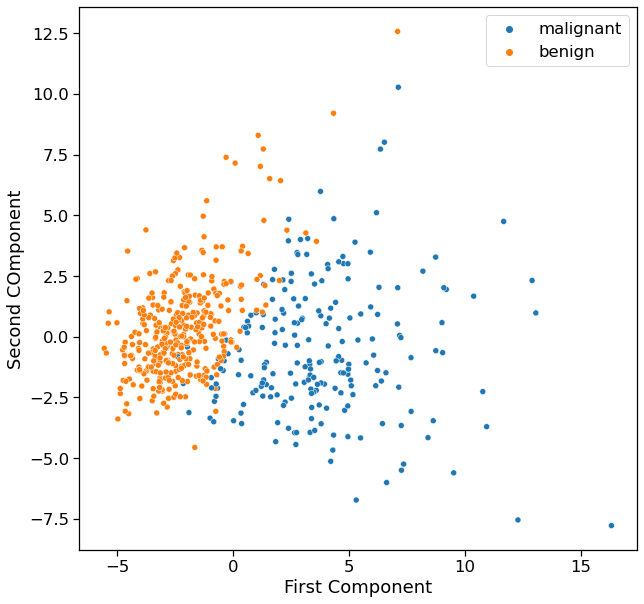

In [50]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    two_pca[0],
    two_pca[1],
    hue = np.where(cancer.target, 'benign', 'malignant')
    )

plt.xlabel('First Component')
plt.ylabel('Second COmponent')

Interpretasi:
1. Kedua komponen mewakili 63.24% dari fitur yang ada
1. Kedua komponen data memisahkan benign dan malignant dengan baik
1. Ada struktur tersembunyi yang dapat diperoleh
1. Malignant lebih bervariasi karakteristik nya, karena plot lebih menyebar daripada benign

# K-Means 1

Analyze generated data from make_blobs
- Set 3 main spot (random_state 42)
- Plot the data using scatter plot
- Determine the optimal number of cluster based on you observation
- Fit K-means and plot the clustering result in scatter plot. Is it 3 cluster?

## Library

In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [52]:
?make_blobs

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or ndarray of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers mus

In [53]:
x, y = make_blobs(random_state = 42)

## Visualisasi Data

C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

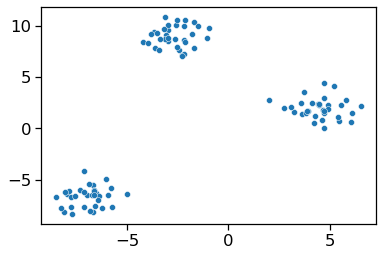

In [54]:
sns.scatterplot(x[:,0],x[:,1])

## K Means

In [55]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [56]:
kmeans.labels_

array([0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1])

C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

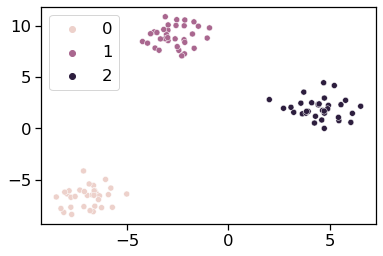

In [57]:
sns.scatterplot(x[:,0],x[:,1], hue = kmeans.labels_)

# K-Means 2

Analyze data 'ilustrasi k means.csv'
- plot the data using scatter plot
- Determine the optimal numberr of cluster
    - Elbow Method
    - Silhouette Method
- Plot the data and clustering result (optimal number of cluster) using scatter plot

## Library

In [58]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [59]:
x = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\ilustrasi k means.csv', sep = ';')
x

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


## EDA

Text(0, 0.5, 'Tinggi Badan Istri')

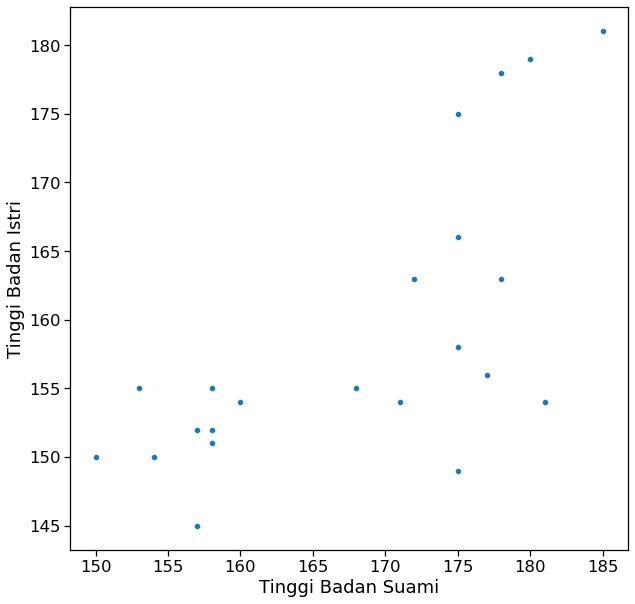

In [60]:
plt.figure(figsize=(10,10))
sns.set_context(context='notebook', font_scale=1.5)
sns.scatterplot(
    data = x,
    x = 'tinggibadan',
    y = 'tinggibadanistri'
)

plt.xlabel('Tinggi Badan Suami')
plt.ylabel('Tinggi Badan Istri')

## Elbow Method

In [61]:
def cluster_evaluation(number_of_cluster):
  # clustering variation
  clusterings = [KMeans(n_clusters=k).fit(x) for k in number_of_cluster]
  centroids = [k.cluster_centers_ for k in clusterings]

  # within sumsq
  D_k = [cdist(x, cent, 'euclidean') for cent in centroids] 
  cIdx = [np.argmin(D, axis=1) for D in D_k] 
  dist = [np.min(D, axis=1) for D in D_k] 
  avgWithinSS = [sum(d)/x.shape[0] for d in dist] 

  return avgWithinSS

1. within sum square, semakin banyak cluster (2,3,4,5..) maka withinsq semakin kecil
1. perubahan withinsq

In [62]:
number_of_clusters = range(2,11)
avgWithinsq = cluster_evaluation(number_of_clusters)

C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Within SQ')

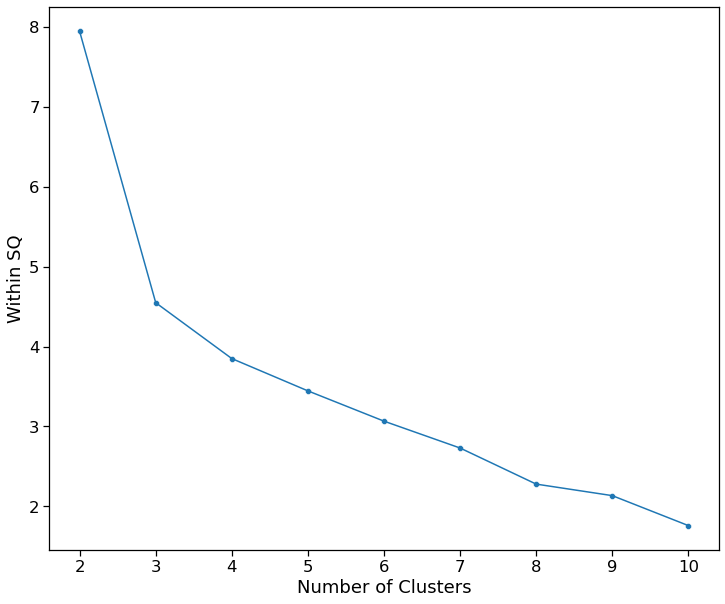

In [63]:
plt.figure(figsize=(12,10))
sns.lineplot(number_of_clusters, avgWithinsq)
sns.scatterplot(number_of_clusters, avgWithinsq)

plt.xlabel('Number of Clusters')
plt.ylabel('Within SQ')

## Silhouette Method

In [64]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [65]:
label = kmeans.labels_
silhouette_score(x, label, metric = 'euclidean')

0.6172319390416597

In [66]:
score = []
number_of_clusters = range(2,11)

for i in number_of_clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)

    label = kmeans.labels_
    score.append(silhouette_score(x, label, metric = 'euclidean'))

C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Silhouette Score')

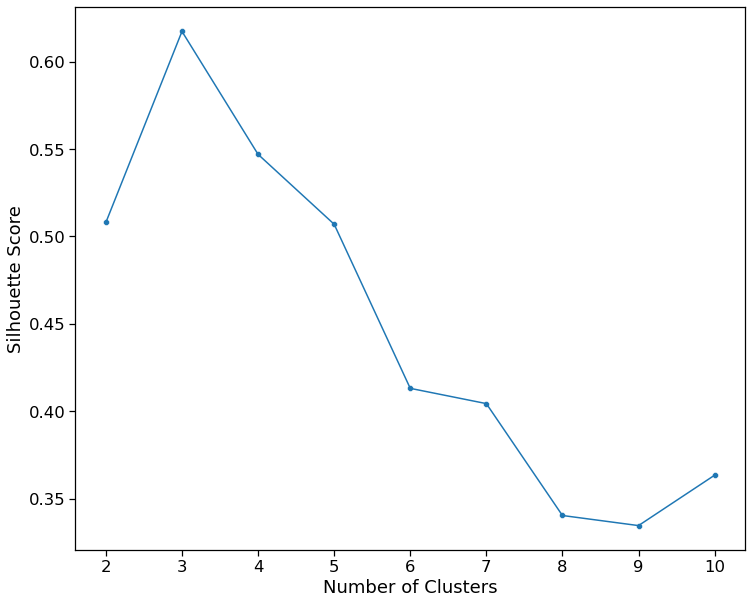

In [67]:
plt.figure(figsize=(12,10))
sns.lineplot(number_of_clusters, score)
sns.scatterplot(number_of_clusters, score)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

## Final Result

In [68]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [69]:
x['CLUSTER'] = kmeans.labels_
x

,tinggibadan,tinggibadanistri,CLUSTER
0,175,175,0
1,178,178,0
2,175,166,2
3,180,179,0
4,185,181,0
5,178,163,2
6,175,158,2
7,181,154,2
8,168,155,2
9,171,154,2


Text(0, 0.5, 'Tinggi Badan Istri')

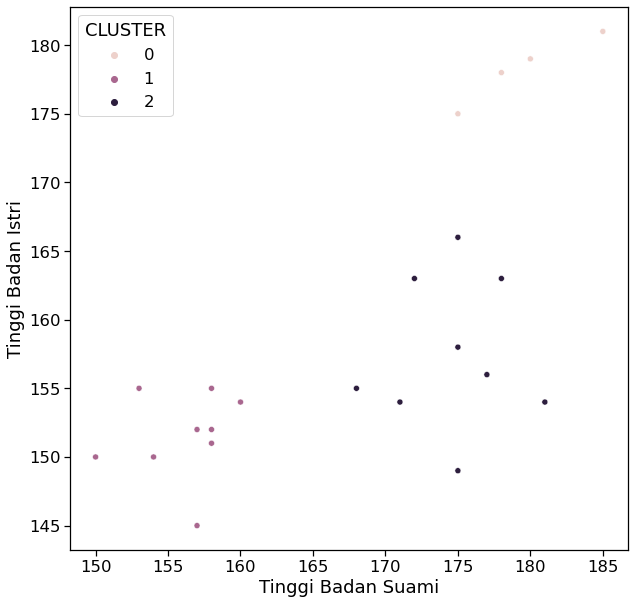

In [70]:
plt.figure(figsize=(10,10))
sns.set_context(context='notebook', font_scale=1.5)
sns.scatterplot(
    data = x,
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    hue = 'CLUSTER'
)

plt.xlabel('Tinggi Badan Suami')
plt.ylabel('Tinggi Badan Istri')

# Agglomerative Clustering

Analyze data 'ilustrasi k means.csv'
- Plot the data using scatter plot
- Make dendrograms
    - Ward Linkage
    - Average linkage
    - Complete linkage
- Compare the result
    - is it different?
    - what about another data?
- plot the data and clustering result *otimal number of cluster from either ward, average, complete) using scatter plot


## Library

In [71]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

## Data

In [72]:
x = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\ilustrasi k means.csv', sep = ';')
x

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


## Eda

Text(0, 0.5, 'Tinggi Badan Istri')

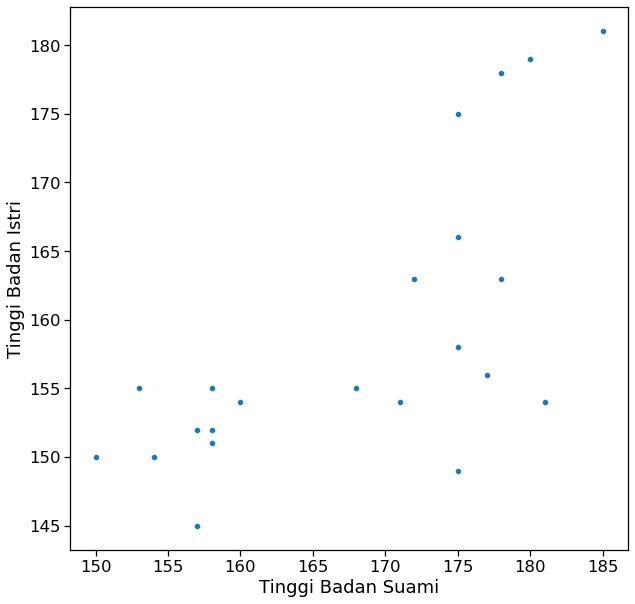

In [73]:
plt.figure(figsize=(10,10))
sns.set_context(context='notebook', font_scale=1.5)
sns.scatterplot(
    data = x,
    x = 'tinggibadan',
    y = 'tinggibadanistri'
)

plt.xlabel('Tinggi Badan Suami')
plt.ylabel('Tinggi Badan Istri')

## Dendogram: Ward

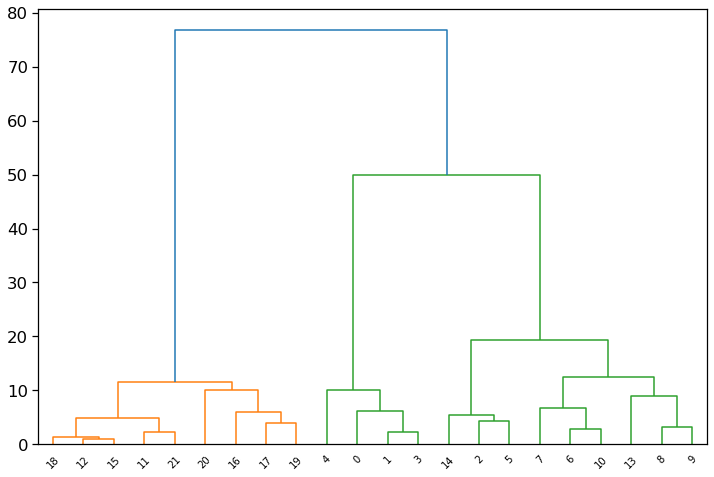

In [74]:
plt.figure(figsize=(12,8))
linkage_array = ward(x)

dendrogram(linkage_array)

plt.show()

Posisi percabangan
1. 2 cluster (hijau dan kuning): jarak antar cluster 77
1. 3 cluster: jarak 50
1. 4 cluster: 20
1. 5 cluster: 12

objective clustering:
- Antar cluster berbeda
- Antar data dalam cluster yang sama mirip

kriteria jarak:
- terlalu tinggi (masalah Antar data dalam cluster yang sama mirip)
- terlalu rendah (masalah antar cluster masih mirip )

agar terpenuhi, gunakan perubahan jarak:
1. 2-3: 27
1. 3-4: 30 (terpilih, karena perubahan angka jarak antar cluster 3 dan 4 paling besar)
1. 4-5: 8
1. 5-6: 2

## Dendogram: Average

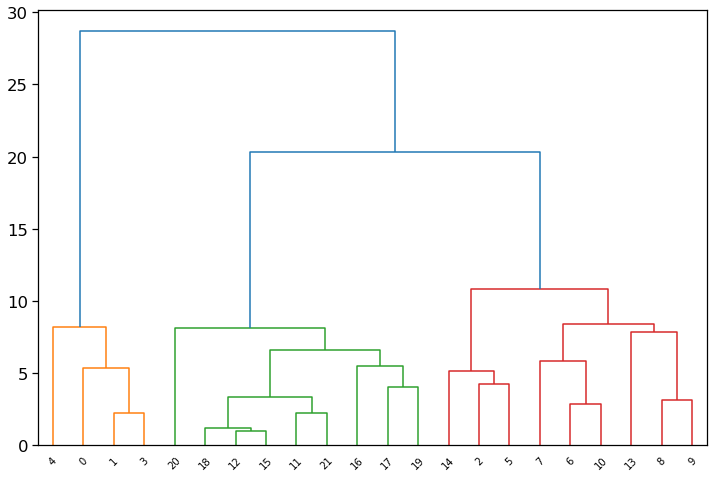

In [75]:
plt.figure(figsize=(12,8))
linkage_array = average(x)

dendrogram(linkage_array)

plt.show()

## Dendogram: Complete

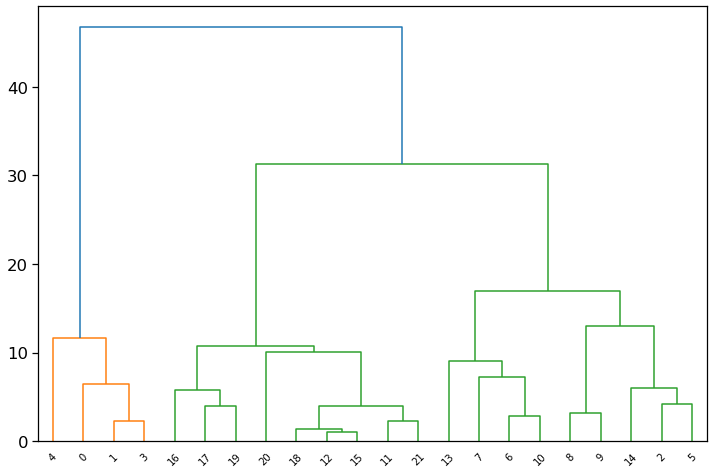

In [76]:
plt.figure(figsize=(12,8))
linkage_array = complete(x)

dendrogram(linkage_array)

plt.show()

## Kanggotaan

In [77]:
clust_ward = AgglomerativeClustering(linkage = 'ward', n_clusters = 3)
x['hasil ward'] = clust_ward.fit_predict(x)

clust_avg = AgglomerativeClustering(linkage = 'average', n_clusters = 3)
x['hasil average'] = clust_avg.fit_predict(x)

clust_complete = AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
x['hasil complete'] = clust_complete.fit_predict(x)

In [78]:
x

,tinggibadan,tinggibadanistri,hasil ward,hasil average,hasil complete
0,175,175,2,1,1
1,178,178,2,1,1
2,175,166,0,0,0
3,180,179,2,1,1
4,185,181,2,1,1
5,178,163,0,0,0
6,175,158,0,0,0
7,181,154,0,0,0
8,168,155,0,0,0
9,171,154,0,0,0


## Visualization

Text(0, 0.5, 'Tinggi Badan Istri')

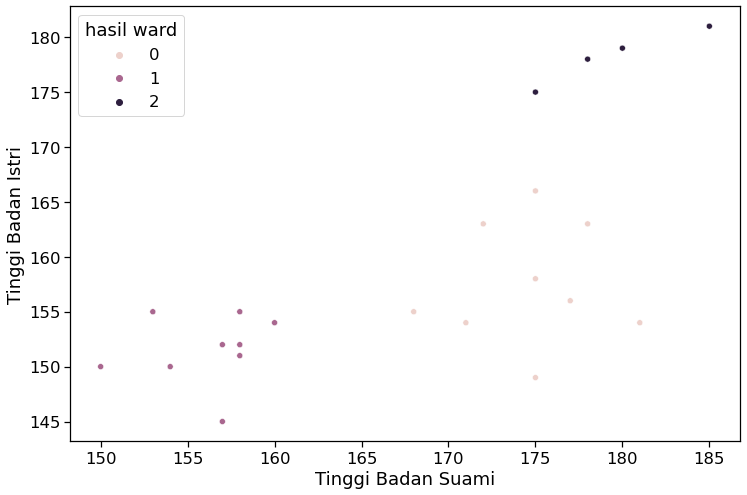

In [79]:
plt.figure(figsize=(12,8))

sns.set_context(context='notebook', font_scale=1.5)
sns.scatterplot(
    data = x,
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    hue = 'hasil ward'
)

plt.xlabel('Tinggi Badan Suami')
plt.ylabel('Tinggi Badan Istri')

## DBScan

Analyze data ilustrasi k means.csv
- plot the data using scatter plot make initial clustering
- Determine the optimal hyperparameter
    - Minimum sample per cluster
    - Epsilon
- Plot the data and clustering result (optimal hyperparameter) using scatter plot

## Library

In [80]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



## Data

In [81]:
x = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\ilustrasi k means.csv', sep = ';')
x

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


## Eda

Text(0, 0.5, 'Tinggi Badan Istri')

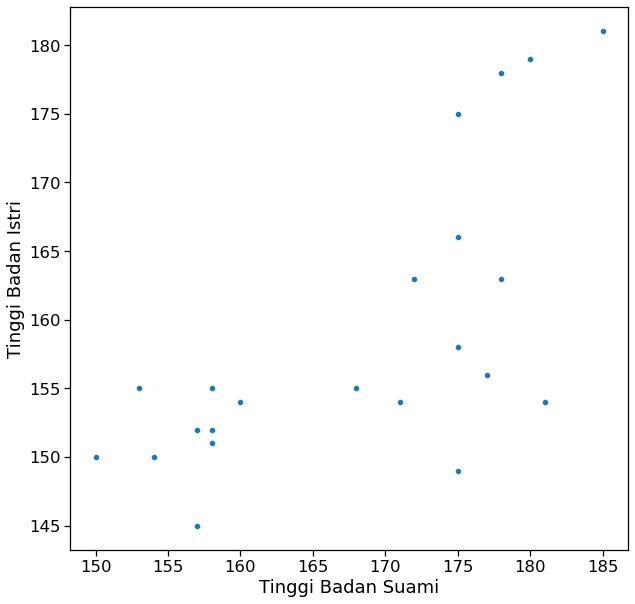

In [82]:
plt.figure(figsize=(10,10))
sns.set_context(context='notebook', font_scale=1.5)
sns.scatterplot(
    data = x,
    x = 'tinggibadan',
    y = 'tinggibadanistri'
)

plt.xlabel('Tinggi Badan Suami')
plt.ylabel('Tinggi Badan Istri')

## Initial Clustering

In [83]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [84]:
dbscan = DBSCAN(eps = 0.7, min_samples = 5)
label = dbscan.fit_predict(x_scaled)
label

array([-1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        1,  1,  1,  1,  1], dtype=int64)

In [85]:
silhouette_score(x_scaled, label)

0.6161772649616482

## Optimisasi eps dan min samples

In [86]:
for eps in [0.6, 0.65, 0.7]:
    for ms in [3, 4, 5, 6]:
        # menampilkan eps dan min samples
        print('epsilon', eps)
        print('min smaples', ms)
        
        # perhitungan silhouetter score
        dbscan = DBSCAN(eps = eps, min_samples = ms)
        label = dbscan.fit_predict(x_scaled)
        print('score', silhouette_score(x_scaled, label))

        # keanggotaan cluster nya
        print('Keanggotaan cluster', np.unique(label))
        print('freq keanggotaan', np.bincount(label + 1))

        print('\n')

epsilon 0.6
min smaples 3
score 0.4618572923610629
Keanggotaan cluster [-1  0  1  2]
freq keanggotaan [1 4 8 9]


epsilon 0.6
min smaples 4
score 0.3901682187136734
Keanggotaan cluster [-1  0  1]
freq keanggotaan [7 6 9]


epsilon 0.6
min smaples 5
score 0.35497113213899967
Keanggotaan cluster [-1  0  1]
freq keanggotaan [8 5 9]


epsilon 0.6
min smaples 6
score 0.5300936637683802
Keanggotaan cluster [-1  0]
freq keanggotaan [13  9]


epsilon 0.65
min smaples 3
score 0.6161772649616482
Keanggotaan cluster [0 1 2]
freq keanggotaan [0 4 9 9]


epsilon 0.65
min smaples 4
score 0.6161772649616482
Keanggotaan cluster [0 1 2]
freq keanggotaan [0 4 9 9]


epsilon 0.65
min smaples 5
score 0.4839777372002889
Keanggotaan cluster [-1  0  1]
freq keanggotaan [6 7 9]


epsilon 0.65
min smaples 6
score 0.5300936637683802
Keanggotaan cluster [-1  0]
freq keanggotaan [13  9]


epsilon 0.7
min smaples 3
score 0.6161772649616482
Keanggotaan cluster [0 1 2]
freq keanggotaan [0 4 9 9]


epsilon 0.7
min sm

## Final CLustering

In [87]:
dbscan = DBSCAN(eps = 0.7, min_samples = 4)
label = dbscan.fit_predict(x_scaled)
label

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [88]:
x['cluster'] = label
x

,tinggibadan,tinggibadanistri,cluster
0,175,175,0
1,178,178,0
2,175,166,1
3,180,179,0
4,185,181,0
5,178,163,1
6,175,158,1
7,181,154,1
8,168,155,1
9,171,154,1


Text(0, 0.5, 'Tinggi Badan Istri')

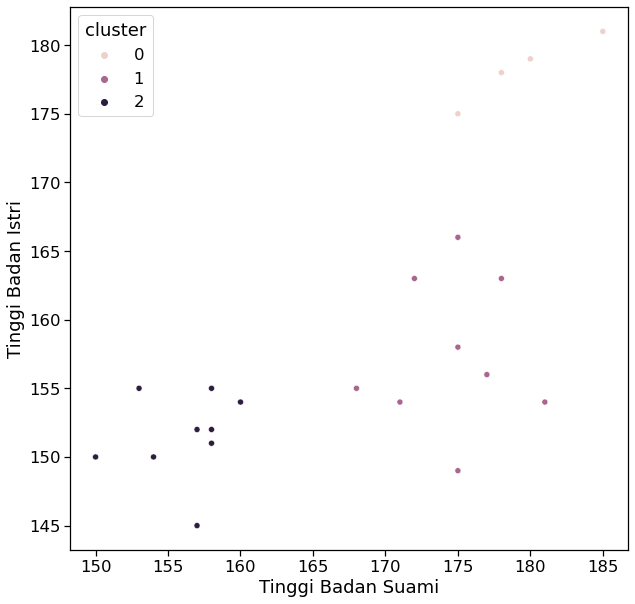

In [89]:
plt.figure(figsize=(10,10))
sns.set_context(context='notebook', font_scale=1.5)
sns.scatterplot(
    data = x,
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    hue = 'cluster'
)

plt.xlabel('Tinggi Badan Suami')
plt.ylabel('Tinggi Badan Istri')